Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['np']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [31]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

[ 2.1] [[-0.5 -0.1]]
1.0


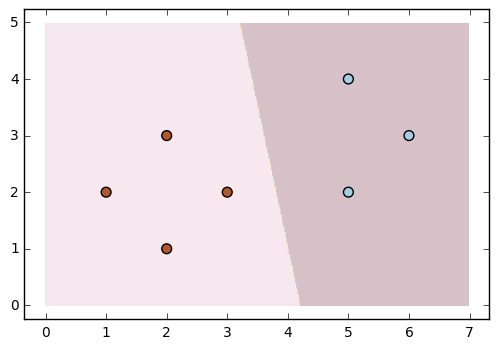

In [5]:
rc = RidgeClassifier(alpha=0)
rc.fit(seven_X, seven_y)
print rc.intercept_, rc.coef_
mlutils.plot_2d_clf_problem(seven_X, seven_y, rc.predict)
print accuracy_score(seven_y, rc.predict(seven_X))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

2.1 [-0.5 -0.1]


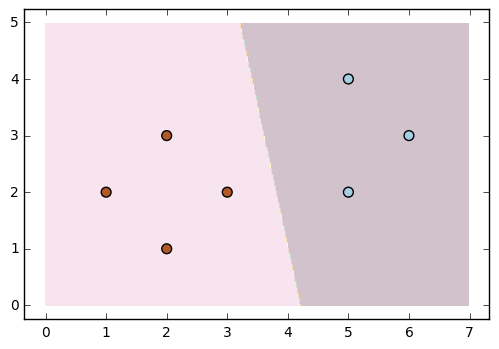

In [6]:
lr = LinearRegression()
lr.fit(seven_X, seven_y)
print lr.intercept_, lr.coef_
mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x: lr.predict(x) >= 0)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

[ 0.84938704] [[-0.4028021   0.30823117]]
0.875


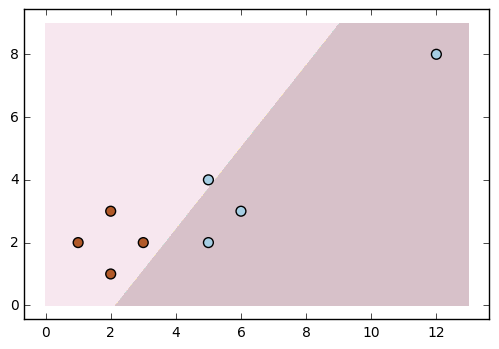

In [8]:
rc = RidgeClassifier(alpha=0)
rc.fit(outlier_X, outlier_y)
print rc.intercept_, rc.coef_
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, rc.predict)
print accuracy_score(outlier_y, rc.predict(outlier_X))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

[ 1.50505051] [[-0.4040404  -0.08080808]]
0.875


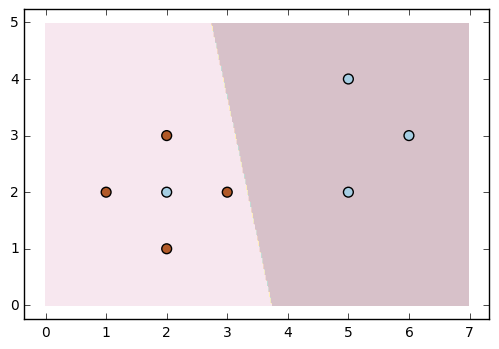

In [10]:
rc = RidgeClassifier(alpha=0)
rc.fit(unsep_X, unsep_y)
print rc.intercept_, rc.coef_
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, rc.predict)
print accuracy_score(unsep_y, rc.predict(unsep_X))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [11]:
from sklearn.datasets import make_classification

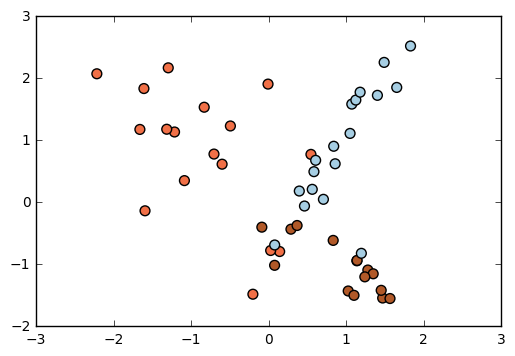

In [178]:
sample_X, sample_y = make_classification(n_samples=50, n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
mlutils.plot_2d_clf_problem(sample_X, sample_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

[2 0 1 2 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 2 1 0 2 0 0 2 0 1 2 1 1 0 1 2 0 0 1
 2 2 2 0 2 0 2 2 1 2 2 0 1]


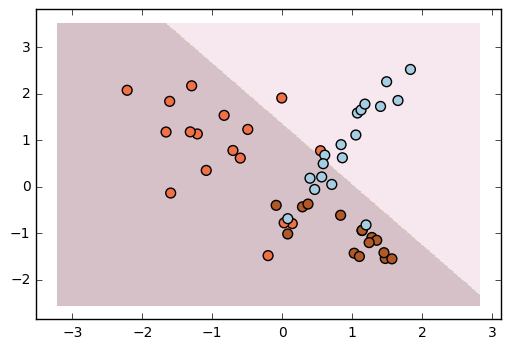

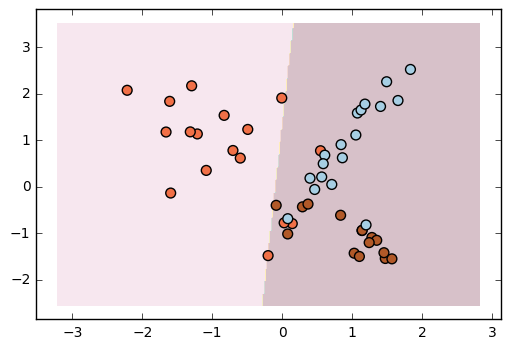

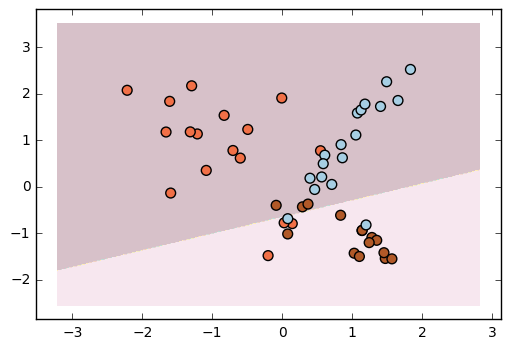

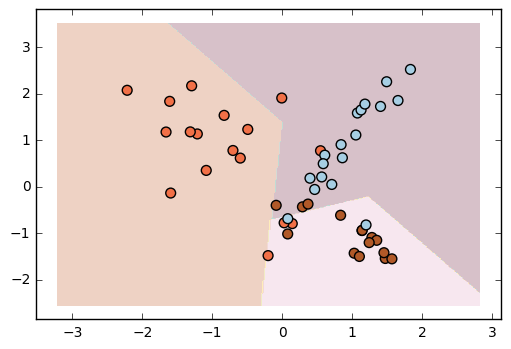

In [179]:
def train_ovr(cls_id):
    rc = RidgeClassifier(alpha=0)
    rc.fit(sample_X, map(lambda x: 1 if x == cls_id else -1, sample_y))
    return rc.predict
h = [train_ovr(i) for i in range(3)]
mlutils.plot_2d_clf_problem(sample_X, sample_y, h[0])
plt.figure()
mlutils.plot_2d_clf_problem(sample_X, sample_y, h[1])
plt.figure()
mlutils.plot_2d_clf_problem(sample_X, sample_y, h[2])
plt.figure()

print sample_y

import warnings

def hh(X):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        def th(x):
            return max(range(3), key=lambda i: h[i](x))
        return np.array(map(th, X))

# for i in range(20):
#     print sample_X[i], sample_y[i], h[0](sample_X[i]), h[1](sample_X[i]), h[2](sample_X[i]), hh([sample_X[i]])
mlutils.plot_2d_clf_problem(sample_X, sample_y, hh)

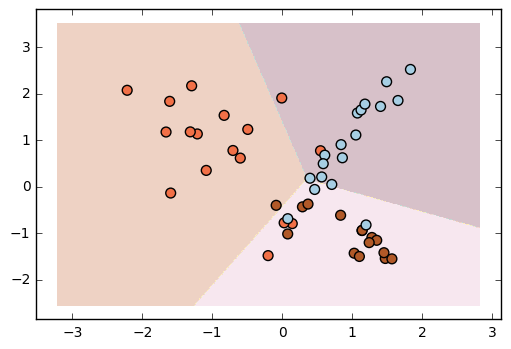

In [180]:
rc = RidgeClassifier(alpha=0)
rc.fit(sample_X, sample_y)
mlutils.plot_2d_clf_problem(sample_X, sample_y, rc.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [28]:
def sigm(a):
    def f(x):
        return 1/(1+np.exp(-a*x))
    return f

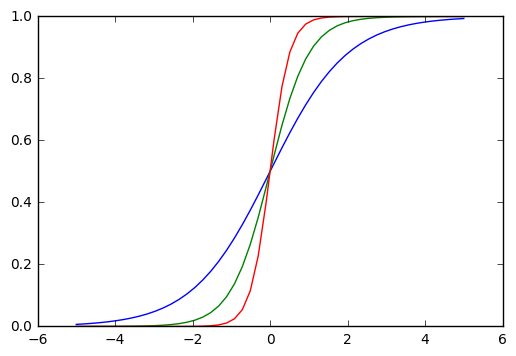

In [29]:
for a in (1, 2, 4):
    Xs = np.linspace(-5, 5, 50)
    plot(Xs, sigm(a)(Xs))

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [95]:
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    y = np.array(map(lambda t: 1 if t == 1 else 0, y))
    N, n = X.shape
    w0, w = 0, np.zeros(n)
    w_ = np.concatenate([np.array([w0]), w])
    old_err = 1e10
    if trace:
        ws = [w_]
    for _ in range(max_iter):
        dw0, dw = 0, np.zeros(n)
        for i in range(N):
            h = sigm(1)(w.dot(X[i]) + w0)
            dw0 += h - y[i]
            dw += (h - y[i]) * X[i]
        w0 -= eta * dw0
        w = (1 - eta * alpha) * w - eta * dw
        w_ = np.concatenate([np.array([w0]), w])
        
        err = cross_entropy_error(X, y, w_)
        
        if abs(err - old_err) < epsilon:
            print 'escape', abs(err-old_err), _
            break
        
        old_err = err
        
        if trace:
            ws.append(w_)
               
    return (w_, ws) if trace else w_

def lr_h(x, w):
    return sigm(1)(x.dot(w[1:]) + w[0])

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [96]:
from sklearn.metrics import log_loss

def cross_entropy_error(X, y, w):
    return log_loss(map(lambda t: 1 if t == 1 else 0, y), lr_h(X, w))

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

escape 9.99314068989e-05 946
0.135218727202


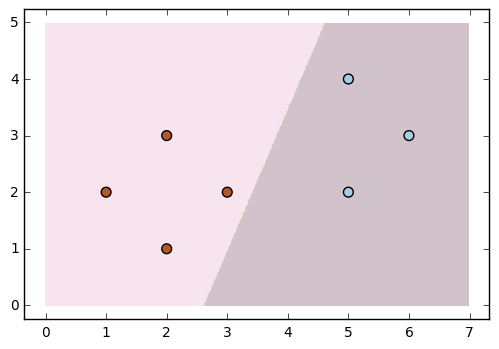

In [97]:
w_ = lr_train(seven_X, seven_y, trace=False)
mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda t: 1 if lr_h(t, w_) >= 0.5 else 0)
print cross_entropy_error(seven_X, seven_y, w_)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [92]:
from sklearn.metrics import zero_one_loss

escape 9.99314068989e-05 946
escape 9.99620869524e-05 1141
escape 9.99314068989e-05 946
escape 9.97853099528e-05 510
escape 9.97412722794e-05 377


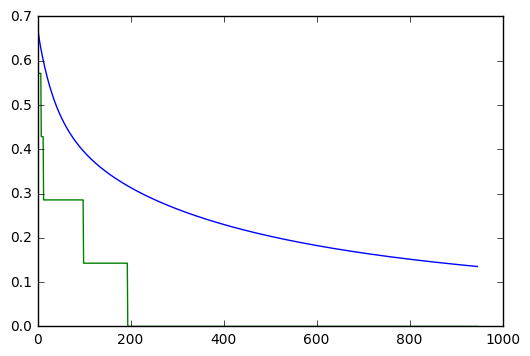

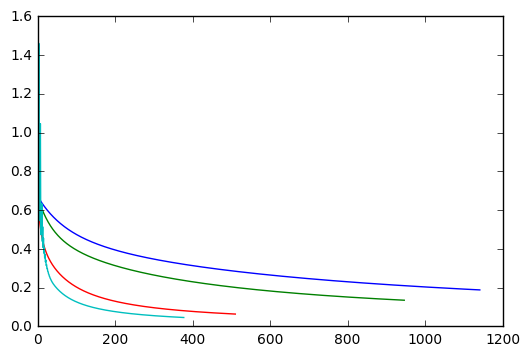

In [115]:
w_, ws = lr_train(seven_X, seven_y, trace=True)
plt.plot(range(len(ws)), map(lambda t: cross_entropy_error(seven_X, seven_y, t), ws))

def loss01(X, y, w):
    return zero_one_loss(map(lambda t: 1 if t == 1 else 0, y), map(lambda t: 1 if t >= 0.5 else 0, lr_h(X, w)))

plt.plot(range(len(ws)), map(lambda t: loss01(seven_X, seven_y, t), ws))

plt.figure()

for eta in (0.005, 0.01, 0.05, 0.1):
    w_, ws = lr_train(seven_X, seven_y, trace=True, eta=eta)
    plt.plot(range(len(ws)), map(lambda t: cross_entropy_error(seven_X, seven_y, t), ws))


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

0.0474127727699


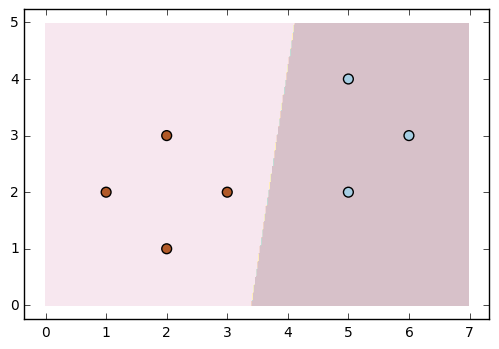

In [138]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000, C=100)
lr.fit(seven_X, seven_y)
mlutils.plot_2d_clf_problem(seven_X, seven_y, lr.predict)
print cross_entropy_error(seven_X, seven_y, list(lr.intercept_) + list(lr.coef_[0]))

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

escape 9.99107140644e-05 842


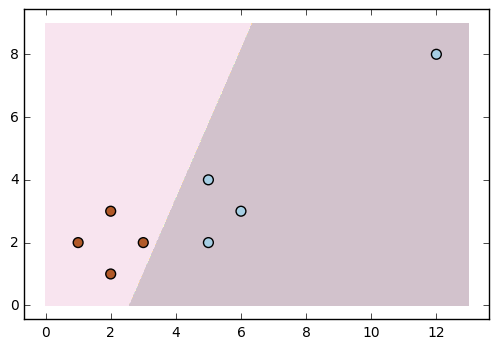

In [139]:
w_ = lr_train(outlier_X, outlier_y)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, lambda t: 1 if lr_h(t, w_) >= 0.5 else 0)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


escape 9.99314068989e-05 946


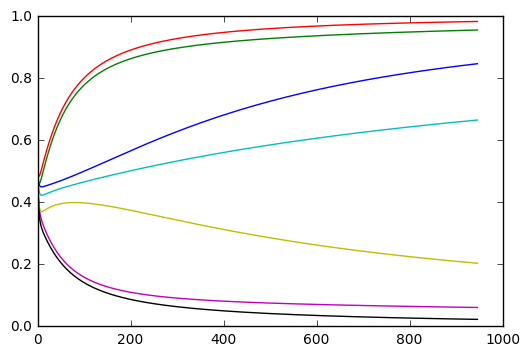

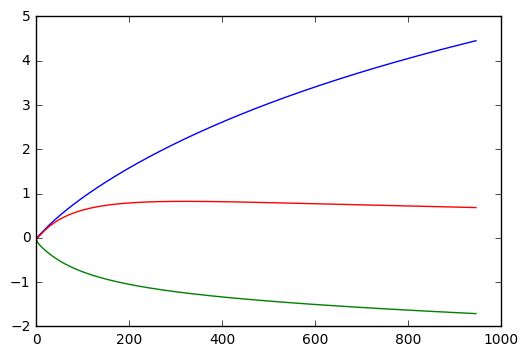

In [142]:
w_, ws = lr_train(seven_X, seven_y, trace=True)

for i in range(7):
    plt.plot(range(len(ws)), map(lambda t: lr_h(seven_X[i], t), ws))

plt.figure()

for i in range(3):
    plt.plot(range(len(ws)), map(lambda t: t[i], ws))

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

escape 9.97351318768e-05 453


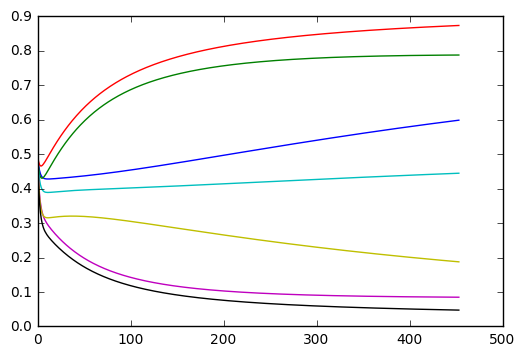

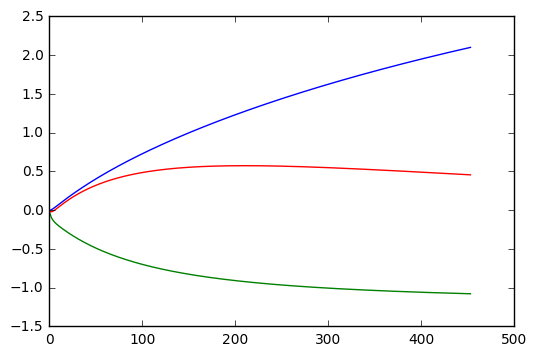

In [144]:
w_, ws = lr_train(unsep_X, unsep_y, trace=True)

for i in range(7):
    plt.plot(range(len(ws)), map(lambda t: lr_h(unsep_X[i], t), ws))

plt.figure()

for i in range(3):
    plt.plot(range(len(ws)), map(lambda t: t[i], ws))

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

escape 4.99967573387e-05 1475
escape 4.99635427449e-05 1174
escape 4.99719200041e-05 530
escape 4.97447934326e-05 146


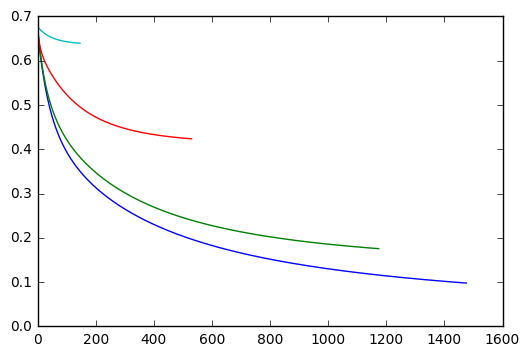

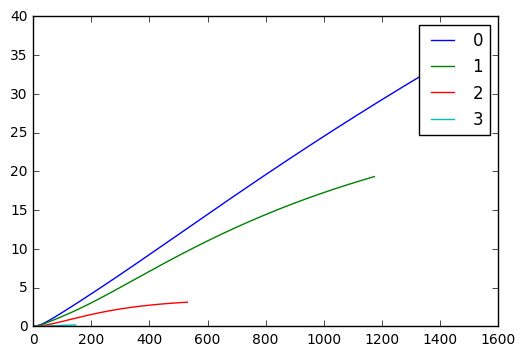

In [155]:
weights = []
for alpha in (0, 1, 10, 100):
    w_, ws = lr_train(seven_X, seven_y, alpha=alpha, trace=True, epsilon=5e-5)
    weights.append(ws)

for i in range(4):
    plt.plot(range(len(weights[i])), map(lambda t: cross_entropy_error(seven_X, seven_y, t), weights[i]))
    
plt.figure()

for i in range(4):
    plt.plot(range(len(weights[i])), map(lambda t: t.dot(t), weights[i]), label='%d' % i)
    
plt.legend()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [182]:
from sklearn.preprocessing import PolynomialFeatures
sample_X, sample_y = make_classification(100, n_features=2, n_redundant=0, n_clusters_per_class=2)

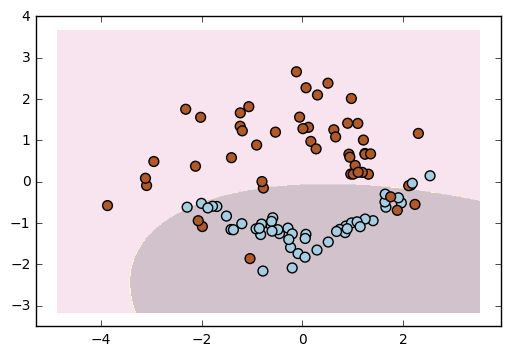

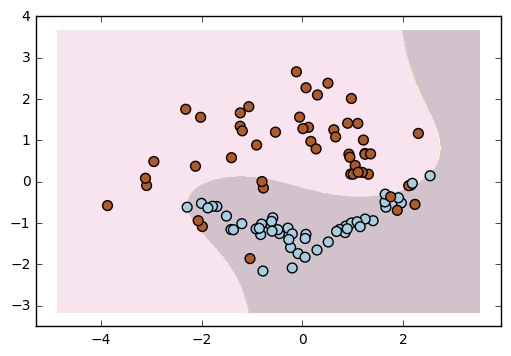

In [187]:
for d in (2, 3):
    pf = PolynomialFeatures(d)
    sample_phi = pf.fit_transform(sample_X)
    lr = LogisticRegression(max_iter=2000, C=1)
    lr.fit(sample_phi, sample_y)
    mlutils.plot_2d_clf_problem(sample_X, sample_y, lambda x: lr.predict(pf.fit_transform(x)))
    plt.figure()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

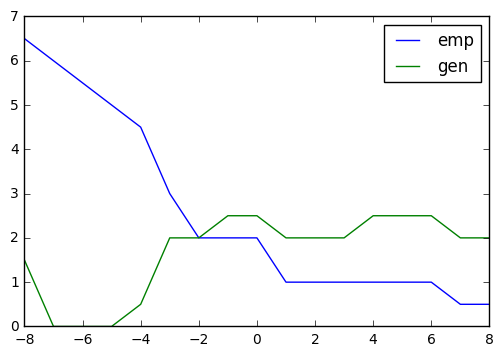

In [192]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split(sample_X, sample_y, train_size=0.7)

pf = PolynomialFeatures(4)
train_phi, test_phi = pf.fit_transform(train_X), pf.fit_transform(test_X)

emp_err, gen_err = [], []

for alpha in range(-8, 9):
    lr = LogisticRegression(C=2**alpha)
    lr.fit(train_phi, train_y)
    emp_delta, gen_delta = train_y - lr.predict(train_phi), test_y - lr.predict(test_phi)
    emp_err.append(0.5*emp_delta.dot(emp_delta))
    gen_err.append(0.5*gen_delta.dot(gen_delta))
plt.plot(range(-8, 9), emp_err, label='emp')
plt.plot(range(-8, 9), gen_err, label='gen')
plt.legend()

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?